# Pokemon PCA Demonstration

## 0) Pokemon Reconstruction with Pokemon Eigenvectors

This code was taken from Professor Peter Sadowski's [PCA GitHub repo](https://github.com/peterjsadowski/pokemon_pca/blob/main/PokemonPCA.ipynb). It was modified to import the preprocessed gray-scaled pokemon images.

In [2]:
import pandas as pd
# Import preprocessed grayscale pokemon images
df = pd.read_csv('https://raw.githubusercontent.com/peterjsadowski/pokemon_pca/main/data/pokemon_mnist/pokemon_mnist_images.csv')
images_pokemon = pd.DataFrame(df).to_numpy()

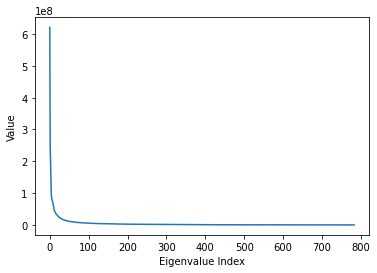

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Define a matrix
X_pokemon = images_pokemon
N         = X_pokemon.shape[0]
X_pokemon = X_pokemon.reshape(N,-1)

# Calculate the mean of each column
mu_pokemon = np.mean(X_pokemon, axis=0)
X_pokemon  = X_pokemon - mu_pokemon

# Calculate covariance matrix of centered matrix
C = X_pokemon.T.dot(X_pokemon) 

# Eigendecomposition of covariance matrix
eigenvalues_pokemon, eigenvectors_pokemon = np.linalg.eig(C)
# The eigenvalues and vectors to be sorted by eigenvalue
a                    = eigenvalues_pokemon.argsort()[::-1]
eigenvalues_pokemon  = eigenvalues_pokemon[a]
eigenvectors_pokemon = eigenvectors_pokemon[:,a] # Column i is ith eigenvalue.
eigenvectors_pokemon = np.real(eigenvectors_pokemon) # Imaginary part should be zero, and we ignore it.
#print(eigenvectors)
#print(eigenvalues)
plt.plot(eigenvalues_pokemon)
plt.xlabel('Eigenvalue Index')
plt.ylabel('Value')
plt.show()

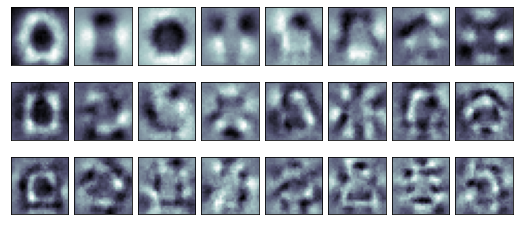

In [4]:
# Visualize principal components.
output_size = 28
fig, axes   = plt.subplots(3, 8, figsize=(9, 4),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
  ax.imshow(eigenvectors_pokemon[:,i].reshape(output_size, output_size), cmap='bone')

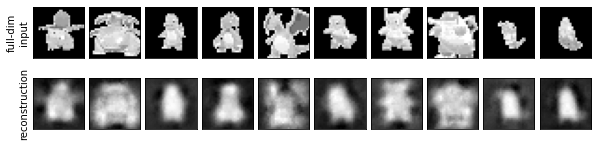

In [5]:
# Plot reconstructions.
k = 20
projected = X_pokemon.dot(eigenvectors_pokemon[:,:k]).dot(eigenvectors_pokemon[:,:k].T) + mu_pokemon
fig, ax   = plt.subplots(2, 10, figsize=(10, 2.5),
                       subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(10):
    ax[0, i].imshow(images_pokemon[i].reshape(output_size,output_size), cmap='binary_r')
    ax[1, i].imshow(projected[i].reshape(output_size,output_size), cmap='binary_r')
    
ax[0, 0].set_ylabel('full-dim\ninput')
ax[1, 0].set_ylabel('reconstruction');

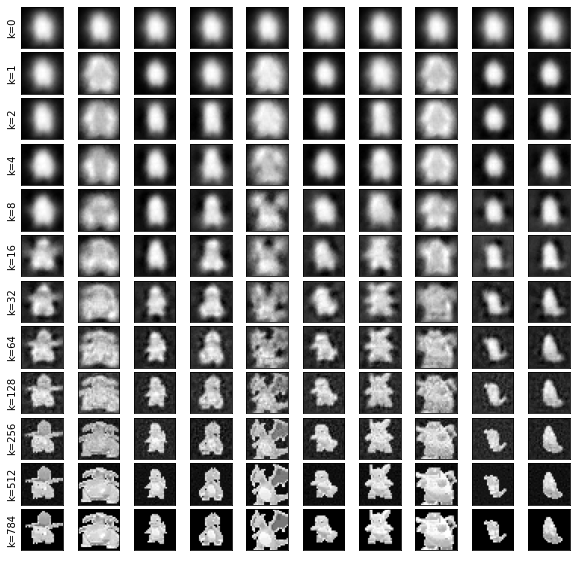

In [6]:
# Plot reconstructions at different k values.
k_values = [0, 1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 784]
fig, ax  = plt.subplots(len(k_values), 10, figsize=(10, 10),
                       subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))

reconstruction_error_pokemon = np.zeros((len(k_values), 2))

# Iterate over k values
for j,k in enumerate(k_values):
  # Calculate projection
  projected = X_pokemon.dot(eigenvectors_pokemon[:,:k]).dot(eigenvectors_pokemon[:,:k].T) + mu_pokemon
  # Calculate reconstruction error for current k
  current_error = np.mean((projected - (X_pokemon + mu_pokemon))**2)
  reconstruction_error_pokemon[j, 0] = current_error
  reconstruction_error_pokemon[j, 1] = k
  # Plot first 10 pokemon for current k
  for i in range(10):
    ax[j, i].imshow(projected[i].reshape(output_size,output_size), cmap='binary_r')
  ax[j, 0].set_ylabel(f'k={k}');

## 1) MNIST Reconstruction with MNIST Eigenvectors

1. Download the MNIST dataset

In [7]:
import tensorflow_datasets as tfds
# Use Tensorflow Datasets to download data.
data          = tfds.load("mnist")
# Convert sample of tf dataset to numpy.
sample        = data["train"].batch(60000).as_numpy_iterator().next() # Get sample.
images_mnist  = sample['image'] # mnist_images.shape = 60000,28,28,1)

local data directory. If you'd instead prefer to read directly from our public
GCS bucket (recommended if you're running on GCP), you can instead pass
`try_gcs=True` to `tfds.load` or set `data_dir=gs://tfds-data/datasets`.





Dataset mnist downloaded and prepared to /root/tensorflow_datasets/mnist/3.0.1. Subsequent calls will reuse this data.


2. Plot the sorted eigenvalues of the covariane matrix

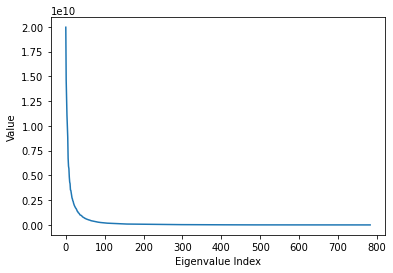

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Define a matrix
N       = images_mnist.shape[0]
X_mnist = images_mnist.reshape(N,-1)

# Calculate the mean of each column
mu_mnist = np.mean(X_mnist, axis=0)
X_mnist  = X_mnist - mu_mnist

# Calculate covariance matrix of centered matrix
# C = X.T.dot(X)
C = np.dot(X_mnist.T, X_mnist)

# Eigendecomposition of covariance matrix
eigenvalues_mnist, eigenvectors_mnist = np.linalg.eig(C)
# The eigenvalues and vectors to be sorted by eigenvalue
a                  = eigenvalues_mnist.argsort()[::-1]
eigenvalues_mnist  = eigenvalues_mnist[a]
eigenvectors_mnist = eigenvectors_mnist[:,a] # Column i is ith eigenvalue.
eigenvectors_mnist = np.real(eigenvectors_mnist) # Imaginary part should be zero, and we ignore it.
#print(eigenvectors)
#print(eigenvalues)
plt.plot(eigenvalues_mnist)
plt.xlabel('Eigenvalue Index')
plt.ylabel('Value')
plt.show()

3. Visualize the top 10 principal components (as images). Describe them in words. Do the principal components involve many pixels or just a few? Do any seem to correspond to particular classes?

The top principal component heavily corresponds to the digit 0. The rest of the top 10 principal components are blurry blobs in the center of the page where a digit would be. They aren't directly linked to specific digit labels, although parts of digits can be extrapolated from them (ex: part of the third top principal component vaguely resembles a digit 8, although there is another non-digit blob in that component). As a whole, it does not seem like these components involve many pixels - they are mostly just one or two swirly blobs that probably correspond to where on the image certain images have curves (ex: the bottom half of a 6 and 8 are similar).  

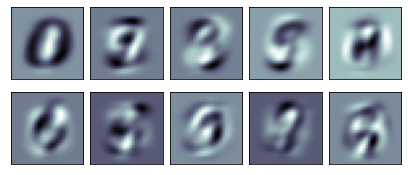

In [9]:
# Visualize principal components.
output_size = 28
fig, axes   = plt.subplots(2, 5, figsize=(7, 3),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
  ax.imshow(eigenvectors_mnist[:,i].reshape(output_size, output_size), cmap='bone')

4. Plot reconstructions of some images using k principal components. Approximately how many principal components do you need in order to recognize the digits?

It only takes around 16 principal components to be able to recognize clear examples of certain digits (0s, 1s, neatly drawn 3s, and 6s). With 32-64 principal components, almost all digits are distinctly identifiable, even though the image itself is still blurry. The improvement from 64 to 256 principal components is minimal, and it isn't until you then double the amount of components (k=512) that the images have almost no blur. The improvement from 512 to all 784 principal components is incredibly small, as most reconstructed images have almost completely converged to their original counterparts already.

This does an excelent job demonstrating the fact that the bulk of the information in images like this MNIST dataset of hand-drawn images is only a fraction of the entire image. The remaining majority of the image helps clarify and sharpen the image, only slightly increasing readability.

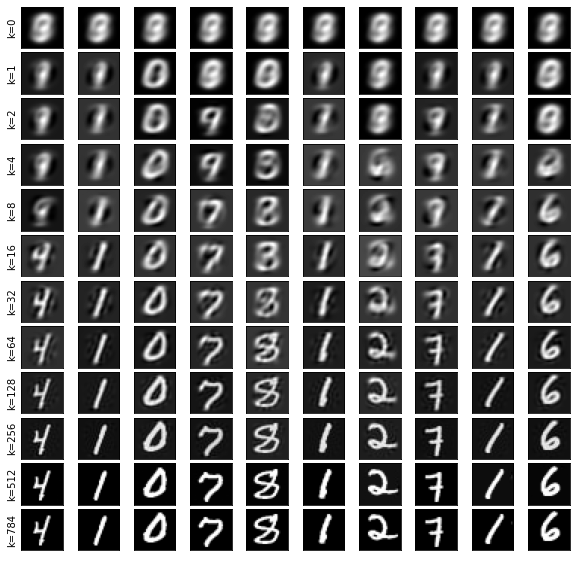

In [10]:
# Plot reconstructions at different k values.
k_values = [0, 1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 784]

fig, ax = plt.subplots(len(k_values), 10, figsize=(10, 10),
                       subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))

for j,k in enumerate(k_values):
  projected = X_mnist.dot(eigenvectors_mnist[:,:k]).dot(eigenvectors_mnist[:,:k].T) + mu_mnist
  for i in range(10):
    ax[j, i].imshow(projected[i].reshape(output_size,output_size), cmap='binary_r')
  ax[j, 0].set_ylabel(f'k={k}');

## 2) TRANSFER LEARNING: Pokemon Reconstruction with MNIST Eigenvectors

1. Take images of pokemon, embed them in the MNIST PCA space, then map back into image space. The pokemon data set has been preprocessed as grayscale images of size 28x28.

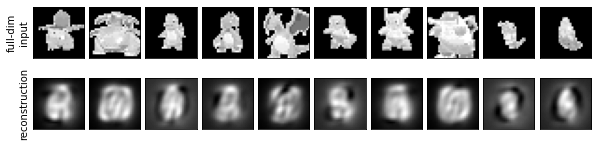

In [11]:
# Plot reconstructions.
k           = 20
output_size = 28
projected   = X_pokemon.dot(eigenvectors_mnist[:,:k]).dot(eigenvectors_mnist[:,:k].T) + mu_pokemon
fig, ax     = plt.subplots(2, 10, figsize=(10, 2.5),
                       subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(10):
    ax[0, i].imshow(images_pokemon[i].reshape(output_size,output_size), cmap='binary_r')
    ax[1, i].imshow(projected[i].reshape(output_size,output_size), cmap='binary_r')
    
ax[0, 0].set_ylabel('full-dim\ninput')
ax[1, 0].set_ylabel('reconstruction');

2. Do this for different values values of k. Visualize the Pokemon reconstructions, and compare them with the reconstructions generated when the Pokemon principal components are used for the compression:

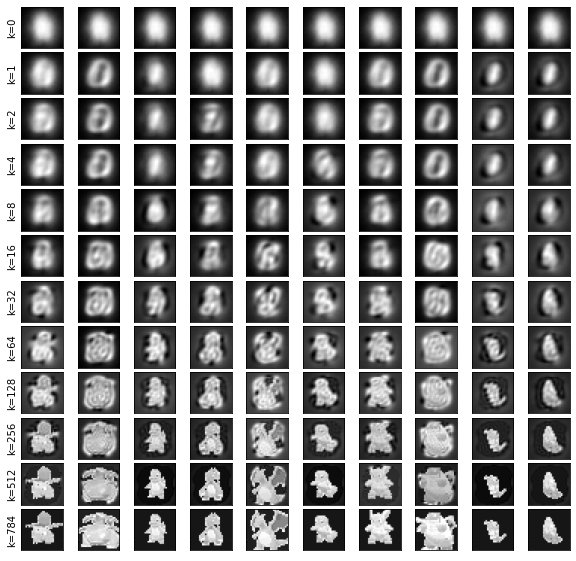

In [12]:
# Plot reconstructions at different k values.
k_values = [0, 1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 784]

fig, ax  = plt.subplots(len(k_values), 10, figsize=(10, 10),
                       subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))

reconstruction_error_mnist = np.zeros((len(k_values), 2))

# Iterate over k values
for j,k in enumerate(k_values):
  # Calculate projection
  projected = X_pokemon.dot(eigenvectors_mnist[:,:k]).dot(eigenvectors_mnist[:,:k].T) + mu_pokemon
  # Calculate reconstruction error for current k
  current_error = np.mean((projected - (X_pokemon + mu_pokemon))**2)
  reconstruction_error_mnist[j, 0] = current_error
  reconstruction_error_mnist[j, 1] = k
  # Plot first 10 pokemon for current k
  for i in range(10):
    ax[j, i].imshow(projected[i].reshape(output_size,output_size), cmap='binary_r')
  ax[j, 0].set_ylabel(f'k={k}');

3. Plot the Pokemon reconstruction error as a function of k for both methods (Pokemon PCA and MNIST PCA).

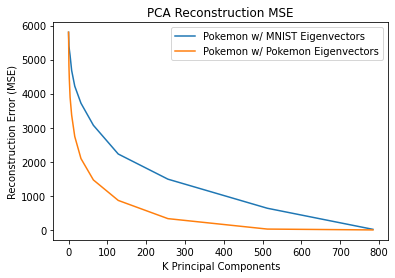

In [13]:
# Plot the reconstruction errors
plt.plot(reconstruction_error_mnist[:,1], reconstruction_error_mnist[:,0], label='Pokemon w/ MNIST Eigenvectors')
plt.plot(reconstruction_error_pokemon[:,1], reconstruction_error_pokemon[:,0], label='Pokemon w/ Pokemon Eigenvectors')
plt.title('PCA Reconstruction MSE')
plt.xlabel('K Principal Components')
plt.ylabel('Reconstruction Error (MSE)')
plt.legend()
plt.show()